In [9]:
from calitp.tables import tbl
from calitp import query_sql
import calitp.magics
import seaborn as sns

import shared_utils
import utils
import os

from siuba import *
import pandas as pd
import geopandas as gpd
import shapely

import datetime as dt
import time
from zoneinfo import ZoneInfo

import rt_analysis as rt

import gcsfs
fs = gcsfs.GCSFileSystem()

from tqdm import tqdm_notebook
from tqdm.notebook import trange, tqdm

In [10]:
import importlib
importlib.reload(rt)

<module 'rt_analysis' from '/home/jovyan/data-analyses/rt_delay/rt_analysis.py'>

In [3]:
analysis_date = dt.date(2022, 2, 8)

In [4]:
pbar = tqdm()

0it [00:00, ?it/s]

In [5]:
# sam = rt.OperatorDayAnalysis(290, analysis_date, pbar)

In [6]:
# sam.set_filter(start_time='15:00', end_time='19:00')

In [7]:
# shared_utils.geography_utils.make_routes_shapefile([300]).to_file('300_shapes.geojson', driver='GeoJSON')

In [11]:
ac_seg = gpd.read_parquet(f'{utils.GCS_FILE_PATH}segment_speed_views/4_02_08_pm_peak.parquet')

In [12]:
sns.set(rc = {'figure.figsize':(13,6)})

In [66]:
ac_1 = (ac_seg.copy()
        >> filter(_.shape_id == 'shp-1T-05', _.direction_id == '1')
        # >> filter(_.shape_id == 'shp-1T-51', _.direction_id == '1')
        >> filter(_.stop_sequence > 17)
       )

In [67]:
ac_6 = (ac_seg.copy()
        >> filter(_.shape_id == 'shp-6-14', _.direction_id == '1')
        >> filter(_.stop_sequence < 15)
       )

In [68]:
to_chart = ac_1
to_chart.stop_name = to_chart.stop_name.str.split('&').map(lambda x: x[-1])
to_chart = to_chart.rename(columns={'speed_mph': 'Segement Speed (mph)',
                              'delay_chg_sec': 'Increase in Delay (seconds)',
                              'stop_sequence': 'Stop Segment ID',
                              'stop_name': 'Segment Cross Street'})

In [69]:
# plt = sns.swarmplot(x = to_chart['Segment Cross Street'], y=to_chart['Increase in Delay (seconds)'],
#               palette=shared_utils.calitp_color_palette.CALITP_CATEGORY_BRIGHT_COLORS,
#              ).set_title('Samtrans Route ECR Northbound Change in Delay by Stop Segment, PM Peak')

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


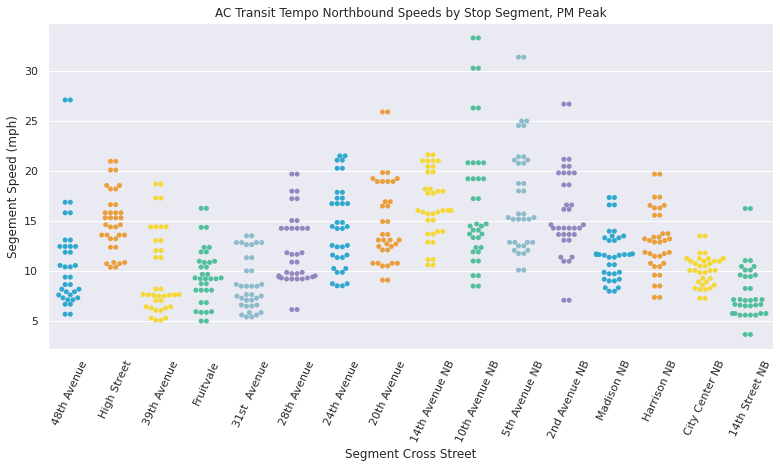

In [70]:
import matplotlib.pyplot as plt
plt.xticks(rotation=65)
tempo_plot = sns.swarmplot(x = to_chart['Segment Cross Street'], y=to_chart['Segement Speed (mph)'],
              palette=shared_utils.calitp_color_palette.CALITP_CATEGORY_BRIGHT_COLORS,
             ).set_title('AC Transit Tempo Northbound Speeds by Stop Segment, PM Peak')

In [71]:
fig = tempo_plot.get_figure()

fig.savefig('./tempo_spd.png', bbox_inches = 'tight')

In [37]:
sam._filter(sam.rt_trips).mean_speed_mph.median()

view filter: {'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_ids': ['ECR', 'ECR-196'], 'direction_id': '0', 'direction': None}


11.978924804257444

In [38]:
bbb = rt.OperatorDayAnalysis(300, analysis_date, pbar)

found parquet
found parquet
found parquet
found parquet
found_parquet
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data


/home/jovyan/data-analyses/rt_delay/rt_analysis.py:376: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/jovyan/data-analyses/rt_delay/rt_analysis.py:376: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/jovyan/data-analyses/rt_delay/rt_analysis.py:376: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/jovyan/data-analyses/rt_delay/rt_analysis.py:376: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/jovyan/data-analyses/rt_delay/rt_analysis.py:376: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/jovyan/data-analyses/rt_delay/rt_analysis.py:376:

In [39]:
bbb.rt_trips.route_id.unique()

array(['3354', '3359', '3363', '3364', '3355', '3374', '3365', '3360',
       '3367', '3353', '3372', '3368', '3370', '3366', '3361', '3369',
       '3362', '3357'], dtype=object)

In [40]:
bbb.reset_filter()

In [45]:
bbb.set_filter(start_time='15:00', end_time='19:00', route_ids = ['3353'], direction_id = '0')

{'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_ids': ['3353'], 'direction_id': '0', 'direction': None}


In [46]:
# bbb.set_filter(start_time='15:00', end_time='19:00')

In [47]:
# bbb.filter_formatted = ', Route 1, PM Peak, Feb 08 (Tue)'

In [48]:
bbb.segment_speed_map(how='low_speeds', size=[1300, 400])

view filter: {'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_ids': ['3353'], 'direction_id': '0', 'direction': None}


/home/jovyan/data-analyses/rt_delay/rt_analysis.py:541: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/jovyan/data-analyses/rt_delay/rt_analysis.py:578: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



In [ ]:
sns.set(rc = {'figure.figsize':(12,6)})

In [ ]:
to_chart = bbb.stop_segment_speed_view.copy()
to_chart = to_chart >> filter(_.stop_sequence > 25, _.stop_sequence < 33) ## extent of bus lane
to_chart.stop_name = to_chart.stop_name.str.split('SANTA MONICA EB &')
to_chart.stop_name = to_chart.stop_name.map(lambda x: (x[1][:-2]).title())
to_chart = to_chart.rename(columns={'speed_mph': 'Segement Speed (mph)',
                              'delay_chg_sec': 'Increase in Delay (seconds)',
                               'stop_sequence': 'Stop Segment ID',
                                   'stop_name': 'Segment Cross Street'})

In [ ]:
# plt = sns.swarmplot(x = to_chart['Segment Cross Street'], y=to_chart['Increase in Delay (seconds)'],
#               palette=shared_utils.calitp_color_palette.CALITP_CATEGORY_BRIGHT_COLORS,
#              ).set_title('BBB Route 2 Eastbound Change in Delay by Stop Segment, PM Peak')

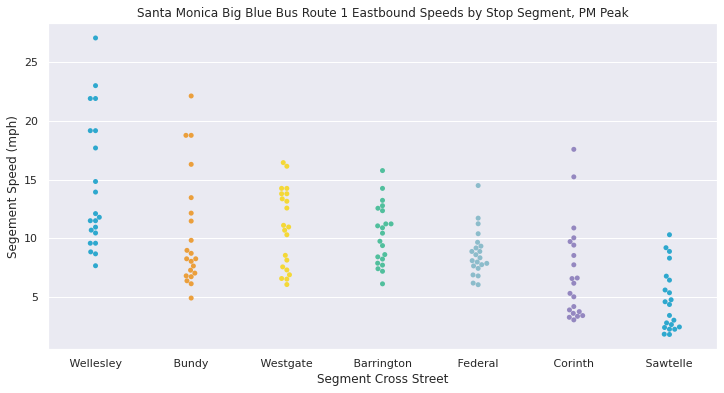

In [ ]:
import matplotlib.pylab as plt
# plt.xticks(rotation=65)
speed_variability = sns.swarmplot(x = to_chart['Segment Cross Street'], y=to_chart['Segement Speed (mph)'],
              palette=shared_utils.calitp_color_palette.CALITP_CATEGORY_BRIGHT_COLORS,
             ).set_title('Santa Monica Big Blue Bus Route 1 Eastbound Speeds by Stop Segment, PM Peak')

In [ ]:
# fig = speed_variability.get_figure()

In [ ]:
# fig.savefig('./bbb_spd.png', bbox_inches = 'tight')